In [1]:
import pandas as pd
import numpy as np
import datetime as dt

print(pd.__version__)
print(np.__version__)


1.4.4
1.22.3


## Working with `DatetimeIndex`

In [2]:
dt1 = dt.datetime(2021,1,1)
dt2 = pd.Timestamp('2021-1-1')
dt3 = pd.to_datetime('2021-1-1')
dt4 = pd.DatetimeIndex(['2021-1-1'])
print(dt1)
print(dt2)
print(dt3)
print(dt4)

print(type(dt1))
print(type(dt2))
print(type(dt3))
print(type(dt4))

2021-01-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00
DatetimeIndex(['2021-01-01'], dtype='datetime64[ns]', freq=None)
<class 'datetime.datetime'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [3]:
## pandas.to_datetime()
dates = ['2021-1-1', '2021-1-2']
pd_dates = pd.to_datetime(dates)
print(pd_dates)
print(type(pd_dates)) # Interestingly, the output is now of type DatetimeIndex

DatetimeIndex(['2021-01-01', '2021-01-02'], dtype='datetime64[ns]', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [6]:
# Let's create a dates list

dates = ['2021-01-01', # date str format %Y-%m-%d
         '2/1/2021', # date str format %m/%d/%Y
         '03-01-2021', # date  str format %m-%d-%Y
         'April 1, 2021', # date  str format %B %d, %Y
         '20210501', # date str format %Y%m%d
          np.datetime64('2021-07-01'), # numpy datetime64
          dt.datetime(2021, 8, 1), # python datetime
          pd.Timestamp(2021,9,1) # pandas Timestamp
          ]
parsed_dates = pd.to_datetime(
                 dates,
                 infer_datetime_format=True,
                 errors='coerce' # it instructs pandas to set value to NaT if it coulnd not parse
                 )
                 # NaN -> Not a Number
                 # NaT -> Not a Time
                 # NA -> Not Available
     
print(parsed_dates) # to_datetime() function properly parsed the entire list 
                    # of different string representations and date types 

## same can be achieved using Pd.DatetimeIndex()
print(pd.DatetimeIndex(dates))


DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)


In [8]:
## DatetimeIndex object gives access to many useful properties and methods as below

print(f'Name of Day : {parsed_dates.day_name()}')

print(f'Month : {parsed_dates.month}')

print(f'Year : {parsed_dates.year}')

print(f'Days in Month : {parsed_dates.days_in_month}')

print(f'Quarter {parsed_dates.quarter}')

print(f'Quarter Start : {parsed_dates.is_quarter_start}')

print(f'Leap Year : {parsed_dates.is_leap_year}')

print(f'Month Start : {parsed_dates.is_month_start}')

print(f'Month End : {parsed_dates.is_month_end}')

print(f'Year Start : {parsed_dates.is_year_start}')

Name of Day : Index(['Friday', 'Monday', 'Monday', 'Thursday', 'Saturday', 'Thursday',
       'Sunday', 'Wednesday'],
      dtype='object')
Month : Int64Index([1, 2, 3, 4, 5, 7, 8, 9], dtype='int64')
Year : Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021], dtype='int64')
Days in Month : Int64Index([31, 28, 31, 30, 31, 31, 31, 30], dtype='int64')
Quarter Int64Index([1, 1, 1, 2, 2, 3, 3, 3], dtype='int64')
Quarter Start : [ True False False  True False  True False False]
Leap Year : [False False False False False False False False]
Month Start : [ True  True  True  True  True  True  True  True]
Month End : [False False False False False False False False]
Year Start : [ True False False False False False False False]


In [15]:
## Alternate way to generate DatetimeIndex with pandas.date_range()

## multiple different results obtained based on parameter values
print(pd.date_range(start='2021-01-01', periods=3, freq='D'))

print(pd.date_range(start='2021-01-01',
               end='2021-01-03',
               freq='D'))

print(pd.date_range(start='2021-01-01',
               end='2021-01-03',
               periods=2))

print(pd.date_range(start='2021-01-01',
               end='2021-01-03',
               periods=4))

print(pd.date_range(start='2021-01-01',
               end='2021-01-03')) # default to daily

# print(pd.date_range(start='2021-01-01',
#                freq='D')) # value error as it lacks sufficient info

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-01-01', '2021-01-03'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 16:00:00',
               '2021-01-02 08:00:00', '2021-01-03 00:00:00'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')


## Providing format argument ot DateTime

Python's datetime module contains the strptime() method to create datetime
or date from a string that contains a date. 

In [21]:
# using dt.datetime
print(dt.datetime.strptime('1/1/2022', '%m/%d/%Y'))
print(dt.datetime.strptime('1 January, 2022', '%d %B, %Y'))
print(dt.datetime.strptime('1-Jan-2022', '%d-%b-%Y'))
print(dt.datetime.strptime('Saturday, January 1, 2022', '%A, %B %d, %Y'))

# using pandas.to_datetime

print(pd.to_datetime('1/1/2022', format='%m/%d/%Y'))
print(pd.to_datetime('1 January, 2022', format='%d %B, %Y'))
print(pd.to_datetime('1-Jan-2022', format='%d-%b-%Y'))
print(pd.to_datetime('Saturday, January 1, 2022', format='%A, %B %d, %Y'))

# to_datetime() funciton can parse a variety od date representations with minimal inputs
print(pd.to_datetime('Saturday, January 1, 2022'))
print(pd.to_datetime('1-Jan-2022')) # similar as above but not explicitly provided format

# use datetime in pandas dataframe

print(pd.DataFrame({'missing types' : [pd.NaT, pd.NA, np.NaN, None]}))



2022-01-01 00:00:00
2022-01-01 00:00:00
2022-01-01 00:00:00
2022-01-01 00:00:00
2022-01-01 00:00:00
2022-01-01 00:00:00
2022-01-01 00:00:00
2022-01-01 00:00:00
2022-01-01 00:00:00
2022-01-01 00:00:00
  missing types
0           NaT
1          <NA>
2           NaN
3          None


,Date,Sales
0,"January 1, 2022",23000
1,"January 2, 2022",19020
2,"January 3, 2022",21000


In [24]:
df = pd.DataFrame(
        {'Date': ['January 1, 2022', 'January 2, 2022', 'January 3, 2022'],
         'Sales': [23000, 19020, 21000]}
            )

print(df.info()) # date is considered as string

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3 non-null      object
 1   Sales   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2022-01-01 to 2022-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes
None


## Working with Unix epoch timestamps

Epoch timestamps, sometimes referred to as Unix time or POSIX time, are a common 
way to store datetime in an integer format. This integer represents the number of 
seconds elapsed from a reference point, and in the case of a Unix-based timestamp, the 
reference point is January 1, 1970, at midnight (00:00:00 UTC).

In [31]:
import time
epoch_time = time.time()
print(epoch_time)
print(type(epoch_time))

t = pd.to_datetime(1635220133.855169, unit='s')
print(t)
## to zone aware timestamp
'''
If you want datetime to be time-zone aware - for example, the US/Pacific time 
zone- you can use tz_localize('US/Pacific'). To get a more accurate 
conversion though, it is better to do it in two steps:
I. Convert the time zone-naive object to UTC using tz_localize('UTC'). 
II. Then, convert it to the desired time zone using tz_convert().'''
t.tz_localize('UTC').tz_convert('US/Pacific')

1667999925.2317274
<class 'float'>
2021-10-26 03:48:53.855169024


Timestamp('2021-10-25 20:48:53.855169024-0700', tz='US/Pacific')

In [30]:
df = pd.DataFrame(
        {'unix_epoch': [1641110340,  1641196740, 1641283140, 1641369540],
                'Sales': [23000, 19020, 21000, 17030]}
                )

print(df)

df['Date'] = pd.to_datetime(df['unix_epoch'], unit='s')
df['Date'] = df['Date'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
df.set_index('Date', inplace=True)
print(df)

   unix_epoch  Sales
0  1641110340  23000
1  1641196740  19020
2  1641283140  21000
3  1641369540  17030
                           unix_epoch  Sales
Date                                        
2022-01-01 23:59:00-08:00  1641110340  23000
2022-01-02 23:59:00-08:00  1641196740  19020
2022-01-03 23:59:00-08:00  1641283140  21000
2022-01-04 23:59:00-08:00  1641369540  17030


## Working with Time Deltas

In [32]:
df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC')
        }
)
df

,item,purchase_dt
0,item1,2021-01-01 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00


In [33]:
df['expiration_dt'] = df['purchase_dt'] + pd.Timedelta(days=30)
df

,item,purchase_dt,expiration_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00


In [37]:
df['extended_dt'] = df['purchase_dt'] + pd.Timedelta('35 days 12 hours 30 minutes')
df

,item,purchase_dt,expiration_dt,extended_dt
0,item1,2020-12-31 16:00:00-08:00,2021-02-05 04:30:00-08:00,2021-02-05 04:30:00-08:00
1,item2,2021-01-01 16:00:00-08:00,2021-02-06 04:30:00-08:00,2021-02-06 04:30:00-08:00
2,item3,2021-01-02 16:00:00-08:00,2021-02-07 04:30:00-08:00,2021-02-07 04:30:00-08:00
3,item4,2021-01-03 16:00:00-08:00,2021-02-08 04:30:00-08:00,2021-02-08 04:30:00-08:00
4,item5,2021-01-04 16:00:00-08:00,2021-02-09 04:30:00-08:00,2021-02-09 04:30:00-08:00
5,item6,2021-01-05 16:00:00-08:00,2021-02-10 04:30:00-08:00,2021-02-10 04:30:00-08:00


In [38]:
df.iloc[:,1:] = df.iloc[:, 1:].apply(
                lambda x: x.dt.tz_convert('US/Pacific')
)
df

,item,purchase_dt,expiration_dt,extended_dt
0,item1,2020-12-31 16:00:00-08:00,2021-02-05 04:30:00-08:00,2021-02-05 04:30:00-08:00
1,item2,2021-01-01 16:00:00-08:00,2021-02-06 04:30:00-08:00,2021-02-06 04:30:00-08:00
2,item3,2021-01-02 16:00:00-08:00,2021-02-07 04:30:00-08:00,2021-02-07 04:30:00-08:00
3,item4,2021-01-03 16:00:00-08:00,2021-02-08 04:30:00-08:00,2021-02-08 04:30:00-08:00
4,item5,2021-01-04 16:00:00-08:00,2021-02-09 04:30:00-08:00,2021-02-09 04:30:00-08:00
5,item6,2021-01-05 16:00:00-08:00,2021-02-10 04:30:00-08:00,2021-02-10 04:30:00-08:00


In [39]:
df['exp_ext_diff'] = (
         df['extended_dt'] - df['expiration_dt']
        )
df

,item,purchase_dt,expiration_dt,extended_dt,exp_ext_diff
0,item1,2020-12-31 16:00:00-08:00,2021-02-05 04:30:00-08:00,2021-02-05 04:30:00-08:00,0 days
1,item2,2021-01-01 16:00:00-08:00,2021-02-06 04:30:00-08:00,2021-02-06 04:30:00-08:00,0 days
2,item3,2021-01-02 16:00:00-08:00,2021-02-07 04:30:00-08:00,2021-02-07 04:30:00-08:00,0 days
3,item4,2021-01-03 16:00:00-08:00,2021-02-08 04:30:00-08:00,2021-02-08 04:30:00-08:00,0 days
4,item5,2021-01-04 16:00:00-08:00,2021-02-09 04:30:00-08:00,2021-02-09 04:30:00-08:00,0 days
5,item6,2021-01-05 16:00:00-08:00,2021-02-10 04:30:00-08:00,2021-02-10 04:30:00-08:00,0 days


In [40]:
df['test'] = pd.Timedelta(days=30)
df

,item,purchase_dt,expiration_dt,extended_dt,exp_ext_diff,test
0,item1,2020-12-31 16:00:00-08:00,2021-02-05 04:30:00-08:00,2021-02-05 04:30:00-08:00,0 days,30 days
1,item2,2021-01-01 16:00:00-08:00,2021-02-06 04:30:00-08:00,2021-02-06 04:30:00-08:00,0 days,30 days
2,item3,2021-01-02 16:00:00-08:00,2021-02-07 04:30:00-08:00,2021-02-07 04:30:00-08:00,0 days,30 days
3,item4,2021-01-03 16:00:00-08:00,2021-02-08 04:30:00-08:00,2021-02-08 04:30:00-08:00,0 days,30 days
4,item5,2021-01-04 16:00:00-08:00,2021-02-09 04:30:00-08:00,2021-02-09 04:30:00-08:00,0 days,30 days
5,item6,2021-01-05 16:00:00-08:00,2021-02-10 04:30:00-08:00,2021-02-10 04:30:00-08:00,0 days,30 days


### Python datetime.timedelta vs pd.Timedelta

In [44]:
print(issubclass(pd.Timedelta, dt.timedelta))

# pd.Timedelta takes both strings and intergers

print(pd.Timedelta(days=1, hours=12, minutes=55))
print(pd.Timedelta('1D 12H 55T'))
print(pd.Timedelta('1 day 12 hours 55 minutes'))

# you can use time delta object to make calcs
week_td = pd.Timedelta('1W')
print(pd.to_datetime('1 JAN 2022') + week_td)

True
1 days 12:55:00
1 days 12:55:00
1 days 12:55:00
2022-01-08 00:00:00


In [47]:
## operations using TimeDelta with pandas

df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC'),
        'time_deltas': pd.timedelta_range('1W 2 days 6 hours', periods=6)
        }
)

df['1 week'] = pd.Timedelta('1W')
df['1_week_more'] = df['purchase_dt'] + df['1 week']
df['1_week_less'] = df['purchase_dt'] - df['1 week']


df

,item,purchase_dt,time_deltas,1 week,1_week_more,1_week_less
0,item1,2021-01-01 00:00:00+00:00,9 days 06:00:00,7 days,2021-01-08 00:00:00+00:00,2020-12-25 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,10 days 06:00:00,7 days,2021-01-09 00:00:00+00:00,2020-12-26 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,11 days 06:00:00,7 days,2021-01-10 00:00:00+00:00,2020-12-27 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,12 days 06:00:00,7 days,2021-01-11 00:00:00+00:00,2020-12-28 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,13 days 06:00:00,7 days,2021-01-12 00:00:00+00:00,2020-12-29 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,14 days 06:00:00,7 days,2021-01-13 00:00:00+00:00,2020-12-30 00:00:00+00:00


## Converting Datetime with TimeZone information 

In [48]:
df = pd.DataFrame(
        {       
        'Location': ['Los Angeles', 
                     'New York',
                     'Berlin', 
                     'New Delhi', 
                     'Moscow', 
                     'Tokyo', 
                     'Dubai'],
        'tz': ['US/Pacific', 
               'US/Eastern', 
               'Europe/Berlin', 
               'Asia/Kolkata', 
               'Europe/Moscow', 
               'Asia/Tokyo',
               'Asia/Dubai'],
        'visit_dt': pd.date_range(start='22:00',periods=7, freq='45min'),
        }).set_index('visit_dt')


print(df)

df = df.tz_localize('UTC')

print(df)

df_hq = df.tz_convert('Asia/Tokyo')

print(df_hq)

df['local_dt'] = df.index
df['local_dt'] = df.apply(lambda x: pd.Timestamp.tz_convert(x['local_dt'], x['tz']), axis=1)

print(df)

                        Location             tz
visit_dt                                       
2022-11-10 22:00:00  Los Angeles     US/Pacific
2022-11-10 22:45:00     New York     US/Eastern
2022-11-10 23:30:00       Berlin  Europe/Berlin
2022-11-11 00:15:00    New Delhi   Asia/Kolkata
2022-11-11 01:00:00       Moscow  Europe/Moscow
2022-11-11 01:45:00        Tokyo     Asia/Tokyo
2022-11-11 02:30:00        Dubai     Asia/Dubai
                              Location             tz
visit_dt                                             
2022-11-10 22:00:00+00:00  Los Angeles     US/Pacific
2022-11-10 22:45:00+00:00     New York     US/Eastern
2022-11-10 23:30:00+00:00       Berlin  Europe/Berlin
2022-11-11 00:15:00+00:00    New Delhi   Asia/Kolkata
2022-11-11 01:00:00+00:00       Moscow  Europe/Moscow
2022-11-11 01:45:00+00:00        Tokyo     Asia/Tokyo
2022-11-11 02:30:00+00:00        Dubai     Asia/Dubai
                              Location             tz
visit_dt                    

In [49]:
df = pd.DataFrame(
        {       
        'Location': ['Los Angeles', 
                     'New York',
                     'Berlin', 
                     'New Delhi', 
                     'Moscow', 
                     'Tokyo', 
                     'Dubai'],
        'tz': ['US/Pacific', 
               'US/Eastern', 
               'Europe/Berlin', 
               'Asia/Kolkata', 
               'Europe/Moscow', 
               'Asia/Tokyo',
               'Asia/Dubai'],
        'visit_dt': pd.date_range(start='22:00',periods=7, freq='45min'),
        }).set_index('visit_dt').tz_localize('UTC').tz_convert('Asia/Tokyo')

df.index = df.index.strftime('%Y-%m-%d %H:%M %p')
df

,Location,tz
visit_dt,,
2022-11-11 07:00 AM,Los Angeles,US/Pacific
2022-11-11 07:45 AM,New York,US/Eastern
2022-11-11 08:30 AM,Berlin,Europe/Berlin
2022-11-11 09:15 AM,New Delhi,Asia/Kolkata
2022-11-11 10:00 AM,Moscow,Europe/Moscow
2022-11-11 10:45 AM,Tokyo,Asia/Tokyo
2022-11-11 11:30 AM,Dubai,Asia/Dubai


### Working with Date Offsets

In [68]:
np.random.seed(10)
df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 20, 6)
        }).set_index('purchase_dt')

df['day'] = df.index.day_name()
df['month'] = df.index.month
df.reset_index().groupby(['purchase_dt', 'day']).sum()
df['BusinessDay'] = df.index - pd.offsets.BDay(0) # next business day using offsets
df['BDay Name'] = df['BusinessDay'].dt.day_name()
df['QuarterEnd'] = df.index + pd.offsets.QuarterEnd(0)
df['MonthEnd'] = df.index + pd.offsets.MonthEnd(0)
df['BmonthEnd'] = df.index + pd.offsets.BMonthEnd(0)
df['CustomerBusinessDay'] = df.index + pd.offsets.CDay(0)
df['FY253Quarter'] = df.index + pd.offsets.FY5253Quarter(3)

df

c:\Users\kbhas\anaconda3\envs\ML_for_CV_env\lib\site-packages\pandas\core\arrays\datetimes.py:760: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  warnings.warn(
c:\Users\kbhas\anaconda3\envs\ML_for_CV_env\lib\site-packages\pandas\core\arrays\datetimes.py:760: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  warnings.warn(


,production,day,month,BusinessDay,BDay Name,QuarterEnd,MonthEnd,BmonthEnd,CustomerBusinessDay,FY253Quarter
purchase_dt,,,,,,,,,,
2021-01-01,13,Friday,1,2021-01-01,Friday,2021-03-31,2021-01-31,2021-01-29,2021-01-01,2021-08-02
2021-01-02,17,Saturday,1,2021-01-04,Monday,2021-03-31,2021-01-31,2021-01-29,2021-01-04,2021-08-02
2021-01-03,8,Sunday,1,2021-01-04,Monday,2021-03-31,2021-01-31,2021-01-29,2021-01-04,2021-08-02
2021-01-04,19,Monday,1,2021-01-04,Monday,2021-03-31,2021-01-31,2021-01-29,2021-01-04,2021-08-02
2021-01-05,4,Tuesday,1,2021-01-05,Tuesday,2021-03-31,2021-01-31,2021-01-29,2021-01-05,2021-08-02
2021-01-06,5,Wednesday,1,2021-01-06,Wednesday,2021-03-31,2021-01-31,2021-01-29,2021-01-06,2021-08-02


                       production  month
BusinessDay BDay Name                   
2021-01-01  Friday             13      1
2021-01-04  Monday             44      3
2021-01-05  Tuesday             4      1
2021-01-06  Wednesday           5      1


<AxesSubplot: xlabel='BusinessDay,BDay Name'>

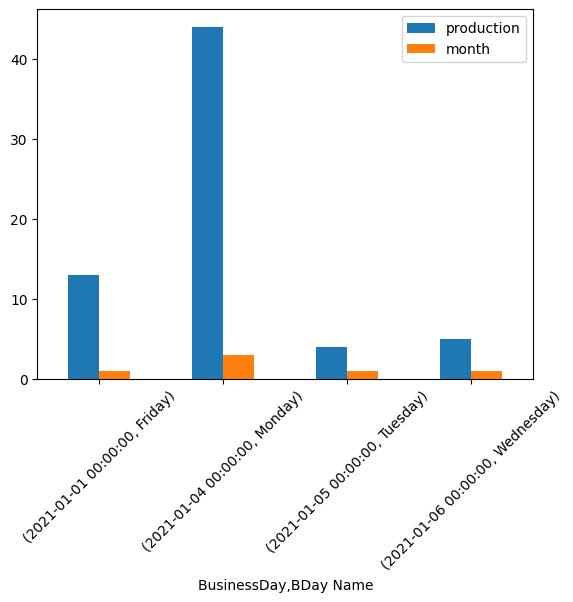

In [69]:
print(df.groupby(['BusinessDay', 'BDay Name']).sum())

df.groupby(['BusinessDay', 'BDay Name']).sum().plot.bar(rot=45)

In [70]:
from pandas.tseries.holiday import (
    USFederalHolidayCalendar
)

df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 20, 6)
        }).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,15
2021-01-02,16
2021-01-03,13
2021-01-04,17
2021-01-05,4
2021-01-06,17


In [71]:
USFederalHolidayCalendar.rules

[Holiday: New Year's Day (month=1, day=1, observance=<function nearest_workday at 0x000001F0FCDDF5E0>),
 Holiday: Birthday of Martin Luther King, Jr. (month=1, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Washington’s Birthday (month=2, day=1, offset=<DateOffset: weekday=MO(+3)>),
 Holiday: Memorial Day (month=5, day=31, offset=<DateOffset: weekday=MO(-1)>),
 Holiday: Juneteenth National Independence Day (month=6, day=19, observance=<function nearest_workday at 0x000001F0FCDDF5E0>),
 Holiday: Independence Day (month=7, day=4, observance=<function nearest_workday at 0x000001F0FCDDF5E0>),
 Holiday: Labor Day (month=9, day=1, offset=<DateOffset: weekday=MO(+1)>),
 Holiday: Columbus Day (month=10, day=1, offset=<DateOffset: weekday=MO(+2)>),
 Holiday: Veterans Day (month=11, day=11, observance=<function nearest_workday at 0x000001F0FCDDF5E0>),
 Holiday: Thanksgiving Day (month=11, day=1, offset=<DateOffset: weekday=TH(+4)>),
 Holiday: Christmas Day (month=12, day=25, observance=<

In [73]:
df['USFederalHolidays'] = df.index + pd.offsets.CDay(calendar=USFederalHolidayCalendar())
df

c:\Users\kbhas\anaconda3\envs\ML_for_CV_env\lib\site-packages\pandas\core\arrays\datetimes.py:760: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  warnings.warn(


,production,USFederalHolidays
purchase_dt,,
2021-01-01,15,2021-01-04
2021-01-02,16,2021-01-04
2021-01-03,13,2021-01-04
2021-01-04,17,2021-01-05
2021-01-05,4,2021-01-06
2021-01-06,17,2021-01-07


In [74]:
from pandas.tseries.holiday import (
    Holiday,
    nearest_workday
)

print(Holiday)
newyears = Holiday("New Years", 
                   month=1, 
                   day=1, 
                   observance=nearest_workday)
print(newyears)

df['NewYearsHoliday'] = df.index + pd.offsets.CDay(calendar=newyears)
df


<class 'pandas.tseries.holiday.Holiday'>
Holiday: New Years (month=1, day=1, observance=<function nearest_workday at 0x000001F0FCDDF5E0>)


c:\Users\kbhas\anaconda3\envs\ML_for_CV_env\lib\site-packages\pandas\core\arrays\datetimes.py:760: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  warnings.warn(


,production,USFederalHolidays,NewYearsHoliday
purchase_dt,,,
2021-01-01,15,2021-01-04,2021-01-04
2021-01-02,16,2021-01-04,2021-01-04
2021-01-03,13,2021-01-04,2021-01-04
2021-01-04,17,2021-01-05,2021-01-05
2021-01-05,4,2021-01-06,2021-01-06
2021-01-06,17,2021-01-07,2021-01-07


### Working with custom business days

In [76]:
dubai_uae_workdays = "Sun Mon Tue Wed Thu"

# UAE national day
nationalDay = [pd.to_datetime('2021-12-2')]


dubai_uae_bday = pd.offsets.CDay(
    holidays=nationalDay,
    weekmask=dubai_uae_workdays,
)

print(dubai_uae_bday.holidays)
print(dubai_uae_bday.weekmask)

df = pd.DataFrame({'Date': pd.date_range('12-1-2021', periods=10, freq=dubai_uae_bday )})
df['Day_name'] = df.Date.dt.day_name()
df

(numpy.datetime64('2021-12-02'),)
Sun Mon Tue Wed Thu


,Date,Day_name
0,2021-12-01,Wednesday
1,2021-12-05,Sunday
2,2021-12-06,Monday
3,2021-12-07,Tuesday
4,2021-12-08,Wednesday
5,2021-12-09,Thursday
6,2021-12-12,Sunday
7,2021-12-13,Monday
8,2021-12-14,Tuesday
9,2021-12-15,Wednesday


### Custom Business Hours

In [79]:
b_hours = pd.offsets.BusinessHour()

cust_hours = pd.offsets.CustomBusinessHour(
    start="8:30",
    end="15:30",
    holidays=nationalDay,
    weekmask=dubai_uae_workdays)

df['Date'] + cust_hours * 16

df

,Date,Day_name
0,2021-12-01,Wednesday
1,2021-12-05,Sunday
2,2021-12-06,Monday
3,2021-12-07,Tuesday
4,2021-12-08,Wednesday
5,2021-12-09,Thursday
6,2021-12-12,Sunday
7,2021-12-13,Monday
8,2021-12-14,Tuesday
9,2021-12-15,Wednesday
